In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#loading the datasets
df_cus=pd.read_csv('QVI_purchase_behaviour.csv')
df_tran=pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
df_cus.shape

(72637, 3)

In [4]:
df_tran.shape

(264836, 8)

In [5]:
df_cus.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
df_cus.isnull().any()

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [8]:
df_cus.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [9]:
df_tran.isnull().any()

DATE              False
STORE_NBR         False
LYLTY_CARD_NBR    False
TXN_ID            False
PROD_NBR          False
PROD_NAME         False
PROD_QTY          False
TOT_SALES         False
dtype: bool

In [10]:
df_tran.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [11]:
df_=df_tran[df_tran['LYLTY_CARD_NBR'].isin(df_cus['LYLTY_CARD_NBR'].tolist())]
print(df_.shape)

(264836, 8)


In [12]:
df_tran['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [13]:
# Merging the customer and transaction datasets
df=df_cus.merge(df_tran, on="LYLTY_CARD_NBR", how = 'inner')
print(df.shape)
df.head()

(264836, 10)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [14]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648360e+05,264836.000000,264836.00000,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,1.355495e+05,43464.036260,135.08011,1.351583e+05,56.583157,1.907309,7.304200
std,8.057998e+04,105.389282,76.78418,7.813303e+04,32.826638,0.643654,3.083226
min,1.000000e+03,43282.000000,1.00000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.00000,6.760150e+04,28.000000,2.000000,5.400000
50%,1.303575e+05,43464.000000,130.00000,1.351375e+05,56.000000,2.000000,7.400000
75%,2.030942e+05,43555.000000,203.00000,2.027012e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.00000,2.415841e+06,114.000000,200.000000,650.000000


In [15]:
# Removing the 2 outliers having extreme values
df=df[df['TOT_SALES']<50]

In [16]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648340e+05,264834.000000,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,43464.036230,135.079423,1.351576e+05,56.583554,1.905813,7.299346
std,8.057990e+04,105.389007,76.784063,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000e+03,43282.000000,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,43373.000000,70.000000,6.760050e+04,28.000000,2.000000,5.400000
50%,1.303570e+05,43464.000000,130.000000,1.351365e+05,56.000000,2.000000,7.400000
75%,2.030940e+05,43555.000000,203.000000,2.026998e+05,85.000000,2.000000,9.200000
max,2.373711e+06,43646.000000,272.000000,2.415841e+06,114.000000,5.000000,29.500000


In [17]:
# Making list of the new feature packet_size
x=[df['PROD_NAME'][i][len(df['PROD_NAME'][i])-4:-1] for i in range(221625)]

In [18]:
y=[]
c=0
for a in x:
    try:
        a=int(a)
        y.append(a)
    except:
        y.append(0)
        c+=1
c

2730

In [19]:
len(y)

221625

In [20]:
pck_size=pd.DataFrame(y)

In [21]:
# Defining a new feature packet_size
df=df[:221625]
df['pck_size']=pck_size
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pck_size
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160


In [22]:
print(df.shape)
print(df.isnull().any())
print(df.dtypes)
print(df.describe())

(221625, 11)
LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
DATE                False
STORE_NBR           False
TXN_ID              False
PROD_NBR            False
PROD_NAME           False
PROD_QTY            False
TOT_SALES           False
pck_size            False
dtype: bool
LYLTY_CARD_NBR        int64
LIFESTAGE            object
PREMIUM_CUSTOMER     object
DATE                  int64
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
pck_size              int64
dtype: object
       LYLTY_CARD_NBR           DATE      STORE_NBR         TXN_ID  \
count   221625.000000  221625.000000  221625.000000  221625.000000   
mean    113493.753345   43464.118091     113.322301  113115.182669   
std      64017.656139     105.414164      64.018612   65290.105516   
min       1000.000000   43282.000000       1.000000       1.000000   
25%      60097.00

In [23]:
print(df['pck_size'].value_counts())
print(df['PROD_QTY'].value_counts())

175    55453
150    36167
134    20991
110    18725
170    16670
165    12882
300    12618
330    10505
380     5322
210     5227
270     5198
200     3806
0       2730
250     2660
190     2564
90      2562
160     2492
220     1316
70      1262
180     1244
125     1231
Name: pck_size, dtype: int64
2    197547
1     23014
5       374
3       346
4       344
Name: PROD_QTY, dtype: int64


In [24]:
# Defining a new feature which shows the flavour of chips(salt)
df['salt']=df['PROD_NAME'].apply(lambda x:1 if 'salt' in x.lower() else 0)

In [25]:
df.salt.value_counts()

0    189422
1     32203
Name: salt, dtype: int64

In [26]:
# Defining a new feature which shows the flavour of chips(cream)
df['cream']=df['PROD_NAME'].apply(lambda x:1 if 'cream' in x.lower() else 0)

In [27]:
df.cream.value_counts()

0    202205
1     19420
Name: cream, dtype: int64

In [28]:
# Defining a new feature which shows the flavour of chips(cheese)
df['cheese']=df['PROD_NAME'].apply(lambda x:1 if 'cheese' in x.lower() else 0)

In [29]:
df.cheese.value_counts()

0    198241
1     23384
Name: cheese, dtype: int64

In [30]:
df.PROD_NAME.value_counts()

Cobs Popd Sea Salt  Chips 110g              2742
Tyrrells Crisps     Ched & Chives 165g      2736
Kettle Tortilla ChpsHny&Jlpno Chili 150g    2734
Kettle 135g Swt Pot Sea Salt                2730
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    2720
                                            ... 
French Fries Potato Chips 175g              1200
RRD Pc Sea Salt     165g                    1195
Woolworths Medium   Salsa 300g              1190
WW Crinkle Cut      Original 175g           1177
NCC Sour Cream &    Garden Chives 175g      1168
Name: PROD_NAME, Length: 114, dtype: int64

In [31]:
# Defining a new feature, the first name of the brands of the chips
z=[k.split()[0] for k in df.PROD_NAME]
df['brand_nme']=z
df.head(60)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pck_size,salt,cream,cheese,brand_nme
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1,0,0,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,0,0,0,Red
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,0,1,0,Grain
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,0,0,0,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,0,0,0,WW
5,1005,MIDAGE SINGLES/COUPLES,Mainstream,43462,1,6,86,Cheetos Puffs 165g,1,2.8,165,0,0,0,Cheetos
6,1007,YOUNG SINGLES/COUPLES,Budget,43438,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,0,1,0,Infuzions
7,1007,YOUNG SINGLES/COUPLES,Budget,43439,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,0,0,0,RRD
8,1009,NEW FAMILIES,Premium,43424,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,0,0,1,Doritos
9,1010,YOUNG SINGLES/COUPLES,Mainstream,43352,1,10,51,Doritos Mexicana 170g,2,8.8,170,0,0,0,Doritos


In [32]:
df.brand_nme.value_counts()

Kettle        34405
Smiths        24302
Pringles      20991
Doritos       20794
Thins         11661
RRD           10044
Infuzions      9249
WW             8723
Cobs           8091
Twisties       7858
Tostitos       7854
Old            7728
Tyrrells       5372
Grain          5227
Natural        5082
Red            5002
Cheezels       3872
CCs            3869
Woolworths     3745
Infzns         2647
Dorito         2625
Smith          2499
Cheetos        2495
Snbts          1350
Burger         1316
GrnWves        1244
Sunbites       1212
French         1200
NCC            1168
Name: brand_nme, dtype: int64

In [33]:
# Defining time gap from the chips selling date
df['time_gap']=df['DATE']-43281
df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,pck_size,salt,cream,cheese,brand_nme,time_gap
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,1,0,0,Natural,109
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,0,0,0,Red,78
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,0,1,0,Grain,250
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,0,0,0,Natural,251
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,0,0,0,WW,125


In [34]:
print(df.time_gap.value_counts())
print(df.STORE_NBR.value_counts())
print(df.PROD_NBR.value_counts())

177    774
176    769
175    763
172    743
171    735
      ... 
339    552
285    552
359    551
161    550
148    530
Name: time_gap, Length: 364, dtype: int64
88     1861
93     1832
165    1819
43     1771
40     1764
       ... 
31        2
211       2
11        2
92        1
76        1
Name: STORE_NBR, Length: 225, dtype: int64
75     2742
112    2736
108    2734
63     2730
33     2720
       ... 
29     1200
11     1195
76     1190
72     1177
98     1168
Name: PROD_NBR, Length: 114, dtype: int64


In [35]:
df['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     45904
RETIREES                  41319
OLDER FAMILIES            41059
YOUNG FAMILIES            36687
YOUNG SINGLES/COUPLES     29936
MIDAGE SINGLES/COUPLES    20929
NEW FAMILIES               5791
Name: LIFESTAGE, dtype: int64

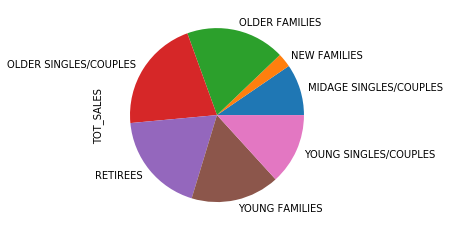

In [36]:
# Visualizing sales based on lifestage of the customer
df_fam=df.groupby('LIFESTAGE',axis=0).sum()
df_fam['TOT_SALES'].plot(kind='pie')

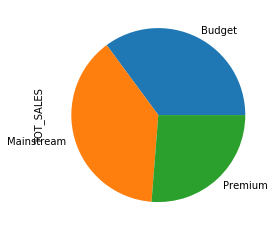

In [37]:
df_pr=df.groupby('PREMIUM_CUSTOMER',axis=0).sum()
df_pr['TOT_SALES'].plot(kind='pie')

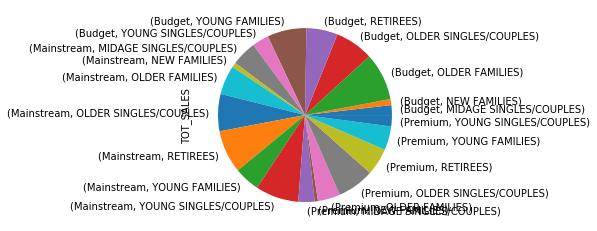

In [38]:
df_c=df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE'],axis=0).sum()
df_c['TOT_SALES'].plot(kind='pie')

In [39]:
# Defining preference of customer based on their demographic
pd.crosstab(df.PREMIUM_CUSTOMER, df.LIFESTAGE)

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,4198,2487,19677,15534,12612,16175,7607
Mainstream,9882,1968,12052,15364,17803,10663,17212
Premium,6849,1336,9330,15006,10904,9849,5117


### Continuous variables analysis

In [40]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'brand_nme', 'time_gap'],
      dtype='object')

### Visualizing continuous variables

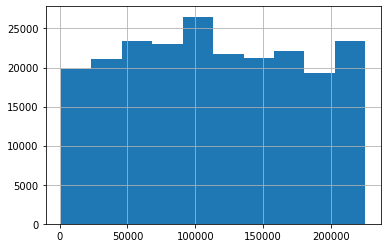

In [41]:
df.LYLTY_CARD_NBR.hist()

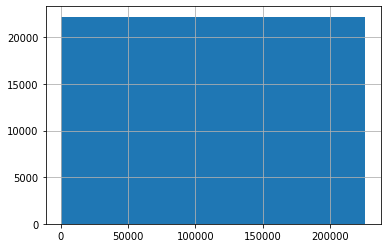

In [42]:
df.TXN_ID.hist()

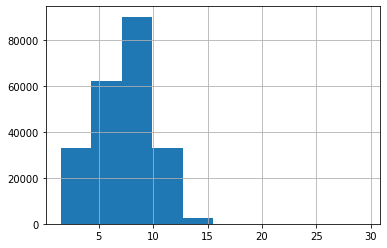

In [43]:
# Histogram of total sales
df.TOT_SALES.hist()

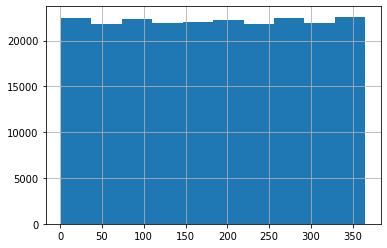

In [44]:
df.time_gap.hist()

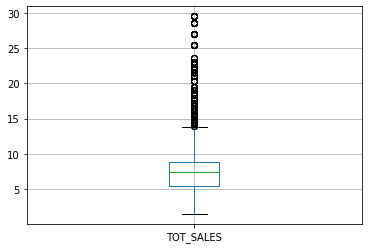

In [45]:
df.boxplot(column=['TOT_SALES'])

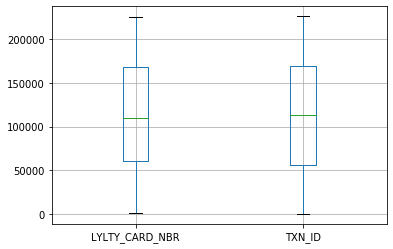

In [46]:
# Both the box plots are same
df.boxplot(column=['LYLTY_CARD_NBR','TXN_ID'])

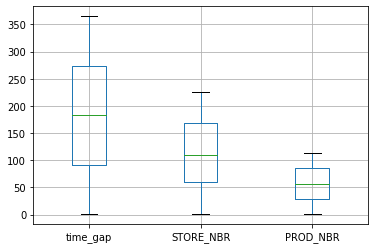

In [47]:
df.boxplot(column=['time_gap','STORE_NBR','PROD_NBR'])

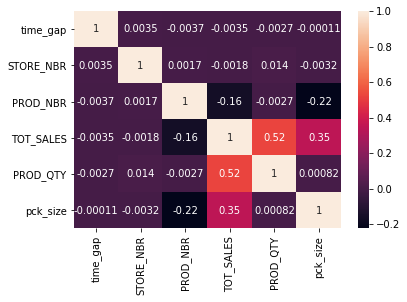

In [48]:
# Correlation between numerical variables
sns.heatmap(df[['time_gap','STORE_NBR','PROD_NBR','TOT_SALES','PROD_QTY','pck_size']].corr(),annot=True)

### Visualizing categorical variable

In [49]:
df_cat=df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','brand_nme','PROD_NBR','STORE_NBR','time_gap','pck_size','salt', 'cream', 'cheese']]

graph for LIFESTAGE: total=7


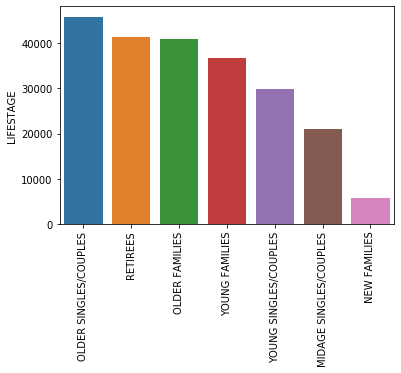

graph for PREMIUM_CUSTOMER: total=3


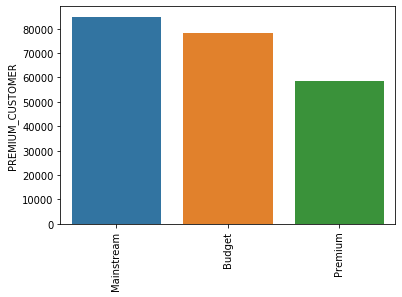

graph for PROD_QTY: total=5


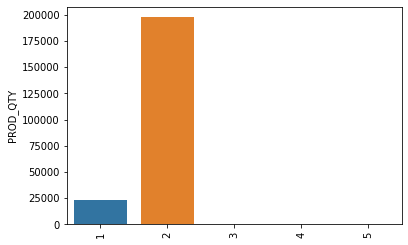

graph for brand_nme: total=29


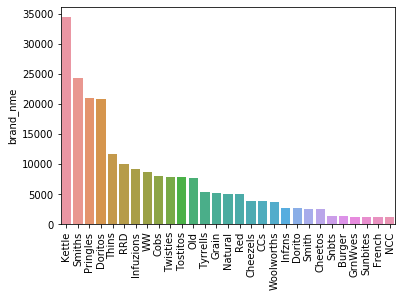

graph for PROD_NBR: total=30


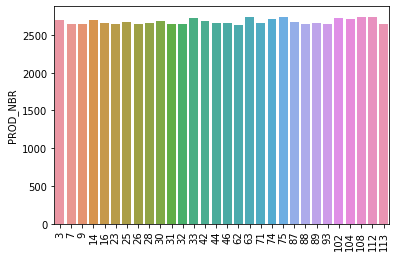

graph for STORE_NBR: total=30


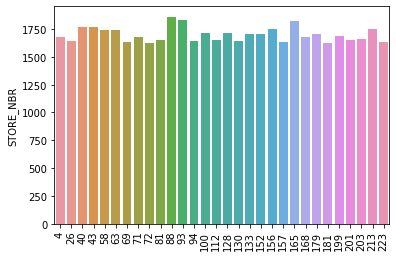

graph for time_gap: total=30


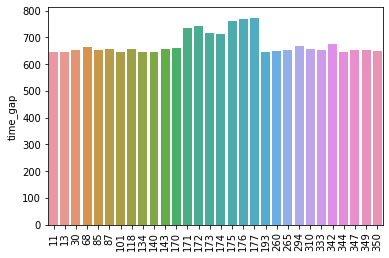

graph for pck_size: total=21


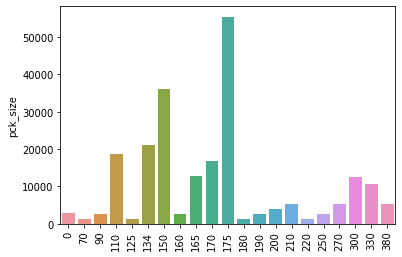

graph for salt: total=2


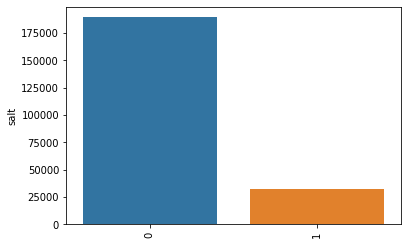

graph for cream: total=2


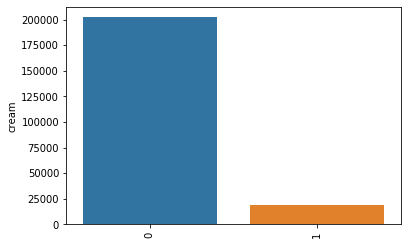

graph for cheese: total=2


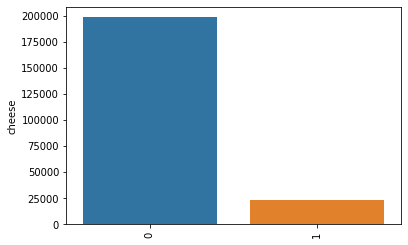

In [50]:
# Bar plots of categorical variables
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()[:30]
    print('graph for %s: total=%d'%(i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [51]:
# Pivot table showing total sales distribution with respect to brand and pack size
pd.pivot_table(df,index=['brand_nme','pck_size'],values='TOT_SALES').sort_values('TOT_SALES',ascending=False)

,,TOT_SALES
brand_nme,pck_size,
Dorito,380,12.239810
Smiths,380,11.235595
Doritos,330,10.935969
Cheezels,330,10.884173
Smiths,330,10.882501
Kettle,175,10.329145
Old,300,9.738703
Kettle,150,8.803814
Twisties,270,8.803540


In [52]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'brand_nme', 'time_gap'],
      dtype='object')

In [53]:
# Pivot table for various categorical variables
df_pivot=df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','pck_size','salt', 'cream', 'cheese', 'brand_nme','TOT_SALES']]

In [54]:
for i in df_pivot.columns:
    print(i)
    print(pd.pivot_table(df_pivot,index=i,values='TOT_SALES').sort_values('TOT_SALES',ascending=False))

LIFESTAGE
                        TOT_SALES
LIFESTAGE                        
OLDER SINGLES/COUPLES    7.364477
RETIREES                 7.360955
MIDAGE SINGLES/COUPLES   7.359246
NEW FAMILIES             7.275013
YOUNG FAMILIES           7.245092
OLDER FAMILIES           7.229897
YOUNG SINGLES/COUPLES    7.138911
PREMIUM_CUSTOMER
                  TOT_SALES
PREMIUM_CUSTOMER           
Mainstream         7.346203
Premium            7.255601
Budget             7.242858
PROD_QTY
          TOT_SALES
PROD_QTY           
5         18.215642
4         14.968023
3         11.516185
2          7.658299
1          3.732543
pck_size
          TOT_SALES
pck_size           
380       11.730909
330       10.895926
270        8.803540
250        8.221729
0          8.030769
300        7.465256
170        7.329934
175        7.299322
110        7.264545
134        7.071264
150        7.039074
210        6.869409
165        6.618460
180        5.848633
190        4.839665
70         4.533756
220      

ValueError: Grouper for 'TOT_SALES' not 1-dimensional

In [55]:
pd.pivot_table(df_pivot,index='LIFESTAGE',columns='cream',values='TOT_SALES')

cream,0,1
LIFESTAGE,,
MIDAGE SINGLES/COUPLES,7.403769,6.910741
NEW FAMILIES,7.294070,7.078947
OLDER FAMILIES,7.257150,6.947705
OLDER SINGLES/COUPLES,7.395416,7.040978
RETIREES,7.393327,7.021883
YOUNG FAMILIES,7.271482,6.968170
YOUNG SINGLES/COUPLES,7.169031,6.822376


In [56]:
df.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER', 'DATE', 'STORE_NBR',
       'TXN_ID', 'PROD_NBR', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'brand_nme', 'time_gap'],
      dtype='object')

In [86]:
df_model=df[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'STORE_NBR','PROD_NBR','PROD_QTY', 'TOT_SALES', 'pck_size',
             'salt', 'cream', 'cheese', 'brand_nme', 'time_gap']]
df_clus=df[['STORE_NBR','PROD_NBR','PROD_QTY', 'TOT_SALES', 'pck_size',
       'salt', 'cream', 'cheese', 'time_gap']]

In [58]:
df_dum=pd.get_dummies(df_model)
print(df_dum.shape)
print(df_dum.columns)

(221625, 48)
Index(['STORE_NBR', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'pck_size', 'salt',
       'cream', 'cheese', 'time_gap', 'LIFESTAGE_MIDAGE SINGLES/COUPLES',
       'LIFESTAGE_NEW FAMILIES', 'LIFESTAGE_OLDER FAMILIES',
       'LIFESTAGE_OLDER SINGLES/COUPLES', 'LIFESTAGE_RETIREES',
       'LIFESTAGE_YOUNG FAMILIES', 'LIFESTAGE_YOUNG SINGLES/COUPLES',
       'PREMIUM_CUSTOMER_Budget', 'PREMIUM_CUSTOMER_Mainstream',
       'PREMIUM_CUSTOMER_Premium', 'brand_nme_Burger', 'brand_nme_CCs',
       'brand_nme_Cheetos', 'brand_nme_Cheezels', 'brand_nme_Cobs',
       'brand_nme_Dorito', 'brand_nme_Doritos', 'brand_nme_French',
       'brand_nme_Grain', 'brand_nme_GrnWves', 'brand_nme_Infuzions',
       'brand_nme_Infzns', 'brand_nme_Kettle', 'brand_nme_NCC',
       'brand_nme_Natural', 'brand_nme_Old', 'brand_nme_Pringles',
       'brand_nme_RRD', 'brand_nme_Red', 'brand_nme_Smith', 'brand_nme_Smiths',
       'brand_nme_Snbts', 'brand_nme_Sunbites', 'brand_nme_Thins',
       'brand_nme_To

In [59]:
df_dum.head()

,STORE_NBR,PROD_NBR,PROD_QTY,TOT_SALES,pck_size,salt,cream,cheese,time_gap,LIFESTAGE_MIDAGE SINGLES/COUPLES,...,brand_nme_Smith,brand_nme_Smiths,brand_nme_Snbts,brand_nme_Sunbites,brand_nme_Thins,brand_nme_Tostitos,brand_nme_Twisties,brand_nme_Tyrrells,brand_nme_WW,brand_nme_Woolworths
0,1,5,2,6.0,175,1,0,0,109,0,...,0,0,0,0,0,0,0,0,0,0
1,1,58,1,2.7,150,0,0,0,78,0,...,0,0,0,0,0,0,0,0,0,0
2,1,52,1,3.6,210,0,1,0,250,0,...,0,0,0,0,0,0,0,0,0,0
3,1,106,1,3.0,175,0,0,0,251,0,...,0,0,0,0,0,0,0,0,0,0
4,1,96,1,1.9,160,0,0,0,125,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=df_clus
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

In [87]:
import plotly.express as px
kmeans = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(df_clus,columns=df_clus.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()